# Comparación entre Modelos de Clasificación

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from src import soporte_comparacion_modelos as sup_mod

import shap

import time

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

---
---

## Importamos los datos

In [2]:
df = pd.read_pickle('datos/encoded_financial_data.pkl')
df.sample()

,is_fraudulent,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,location_City-1,location_City-10,location_City-11,location_City-12,location_City-13,...,location_City-48,location_City-49,location_City-5,location_City-50,location_City-6,location_City-7,location_City-8,location_City-9,purchase_category,customer_age
120,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.942308


## Separamos nuestras variables X e y.

In [3]:
X = df.drop(columns=['is_fraudulent'])
y = df['is_fraudulent']

## Definimos las combinaciones de parametros que les proporcionaremos a los diferentes modelos.

In [4]:
parametros_logistic =  [{'penalty': ['l1'], 'solver': ['saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [10000]},
    {'penalty': ['l2'], 'solver': ['liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [10000]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [10000]},
    {'penalty': ['none'], 'solver': ['lbfgs'], 'max_iter': [10000]}]

parametros_dt = {'max_depth': [4, 10, 14, 25, 40],
            'min_samples_split': [6, 8, 10, 15, 20, 25],
            'min_samples_leaf': [6, 8, 10, 15, 20, 25],
            'max_leaf_nodes': [10, 15, 20, 25, 40, 60, 90, 110]}

parametros_rf = {
            'n_estimators' : [10,20,30,40],
            'max_depth': [5, 10, 15],
            'min_samples_split': [8, 10, 15, 20],
            'min_samples_leaf': [6, 8, 10, 15, 20],
            'max_leaf_nodes': [10, 15, 20, 25]
}

parametros_gb = {
    'n_estimators': [50,100],
    'max_depth': [3,5,7],
    'min_samples_split': [3,4,7],
    'min_samples_leaf': [3,4,7],
    'max_leaf_nodes': [6,10,12]
}

parametros_xgb = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
}

## Declaramos nuestra clase modelo la cual nos hará el trabajo más sencillo

In [5]:
model = sup_mod.ClassificationModel(X, y, random_state=42)

##  Ahora entrenamos a cada uno de los modelos

In [6]:
print("Training Regresión Logística\n")
start_time = time.time()
logistic = model.train("logistic", params=parametros_logistic, scoring="recall", verbose = 1)
print()
print("Time:", time.time() - start_time)
print()
print(logistic)
print("----"*20)

Training Regresión Logística

Fitting 5 folds for each of 43 candidates, totalling 215 fits

Time: 15.877781867980957

LogisticRegression(C=0.01, max_iter=10000, penalty='l1', random_state=42,
                   solver='saga')
--------------------------------------------------------------------------------


In [7]:
print("Training Árbol de Decisión\n")
start_time = time.time()
decisiontree = model.train("decision_tree", params = parametros_dt, scoring="recall", verbose = 1)
print()
print("Time:", time.time() - start_time)
print()
print(decisiontree)
print("----"*20)

Training Árbol de Decisión

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits

Time: 51.07252907752991

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10, min_samples_leaf=6,
                       min_samples_split=6, random_state=42)
--------------------------------------------------------------------------------


In [8]:
print("Training Random Forest\n")
start_time = time.time()
randomforest = model.train("random_forest", params = parametros_rf, scoring="recall", verbose = 1)
print()
print("Time:", time.time() - start_time)
print()
print(randomforest)
print("----"*20)

Training Random Forest

Fitting 5 folds for each of 960 candidates, totalling 4800 fits

Time: 158.53887963294983

RandomForestClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=6,
                       min_samples_split=20, n_estimators=40, n_jobs=-1,
                       random_state=42)
--------------------------------------------------------------------------------


In [9]:
print("Training Gradient Boosting\n")
start_time = time.time()
gradientboost = model.train("gradient_boosting", params = parametros_gb, scoring="recall", verbose = 1)
print()
print("Time:", time.time() - start_time)
print()
print(gradientboost)
print("----"*20)

Training Gradient Boosting

Fitting 5 folds for each of 162 candidates, totalling 810 fits

Time: 102.69319772720337

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=6, min_samples_leaf=4,
                           min_samples_split=3, n_estimators=50,
                           random_state=42)
--------------------------------------------------------------------------------


In [10]:
print("Training XGBoost\n")
start_time = time.time()
xgboost = model.train("xgboost", params = parametros_xgb, scoring="recall", verbose = 1)
print()
print("Time:", time.time() - start_time)
print()
print(xgboost)

Training XGBoost

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Time: 86.99643874168396

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


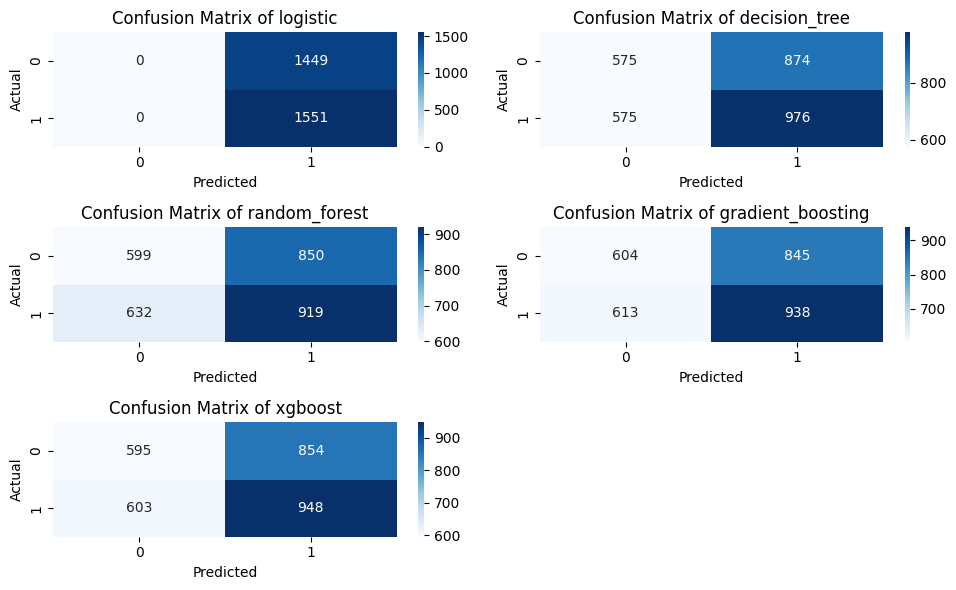

In [11]:
model.plot_confusion_matrix()

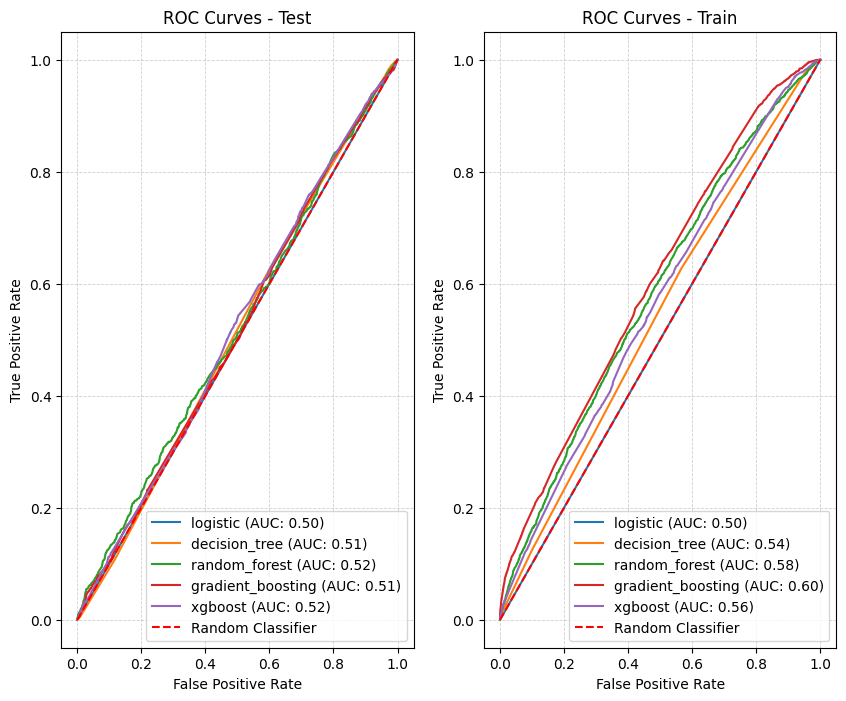

In [12]:
model.plot_roc_curves()


In [13]:
df_metrics = pd.DataFrame()
for k in model.resultados.keys():
    df_it = model.resultados[k]["metrics"]
    df_it["method"] = k
    df_metrics = pd.concat([df_metrics, df_it])

df_resultados_colores = df_metrics.copy()
df_resultados_colores.reset_index(inplace = True)
df_resultados_colores = df_resultados_colores.style.apply(sup_mod.color_filas_por_modelo, axis=1)
df_resultados_colores

,index,precision,accuracy,recall,f1_score,kappa,auc,time,n_jobs,method
0,train,0.502429,0.502429,1.000000,0.668822,0.000000,0.500000,0.003988,None,logistic
1,test,0.517000,0.517000,1.000000,0.681608,0.000000,0.500000,0.003988,None,logistic
2,train,0.527964,0.531000,0.628092,0.573692,0.061109,0.538543,0.007976,8,decision_tree
3,test,0.527568,0.517000,0.629271,0.573949,0.026275,0.510038,0.007976,8,decision_tree
4,train,0.547959,0.553286,0.633494,0.587630,0.105869,0.580666,0.071791,-1,random_forest
5,test,0.519503,0.506000,0.592521,0.553614,0.005939,0.517811,0.071791,-1,random_forest
6,train,0.559580,0.565714,0.636906,0.595745,0.130822,0.602866,0.019559,8,gradient_boosting
7,test,0.526080,0.514000,0.604771,0.562687,0.021725,0.511705,0.019559,8,gradient_boosting
8,train,0.536532,0.540429,0.626386,0.577988,0.080084,0.562465,0.061060,None,xgboost
9,test,0.526082,0.514333,0.611219,0.565464,0.021972,0.516589,0.061060,None,xgboost
